<a href="https://colab.research.google.com/github/kkrusere/NHANES-Data-Visualization-Dashboard-on-Health-Disparities-and-Inequities/blob/main/NHANES_data_collection_and_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79.9 MB 132 kB/s 


## <center> NHANES, Health Disparities Data Visualization Tool</center>
<center> <em>Transformative Research to Address Health Disparities and Advance Health Equity at Minority Serving Institutions</em></center>
<center><img src='https://github.com/kkrusere/NHANES-Data-Visualization-Dashboard-on-Health-Disparities-and-Inequities/blob/main/assets/health_disparities.jpg?raw=true' width=600/></center>


***Project Contributors:*** Kuzi Rusere<br>
**NHANES Health Disparities Dash streamlit App URL:** https://kkrusere-nhanes-data-visualization-dashboard-nhanes-dash-ttgozo.streamlitapp.com/

# **Project Outline**
Problem Statement: The NHANES data is a rich collection of demographics, socioeconomic, dietary, and health-related data. Exploratory Data Analysis of this data can provide some insight into the US Health System and the resulting Health Outcomes of the system. This can also be Used to shed light on and Investigate Health Disparities/Inequities in the Healthcare System. However, if you do not possess the technical know-how on extracting, analyzing, and visualizing NHANES data, for example, knowledge of SAS (an innovative Analytics, Artificial Intelligence, and Data Management software), which is the format that the data is in, I would imagine that if you’re not some sort of a Data Analyst or Data Scientist the data is useless. 


The goal/idea or solution that is being presented by the research project is an interactive data visualization tool on the NHANES data. This  User-friendly, no need for IT support, interactive Data Visualization tool/dashboard. This would Aid anyone with an internet connection (so  doctors, nurses, healthcare professionals and providers, health insurance providers, Health Department officials, regular people, etc.) to visualize, gain insight from the data, and make data-driven decisions on the subject matter (Health disparities and inequities). 

1. **Project Objectve/Define Business Requirement** 
  > Creating an Interactive Data Visualisation Tool (Dashboard) of the NHANES data, Google Trends Search Demand data, Twitter and Reddit posts, tweets and comments using Python and Streamlit.
2. **Data Collecton**
  > Since we dont have access to the database where the NHANES data is housed, we are going to devise a plan to programatically download the data from the NHANES website (in a future project, we create an API to access the data). As stated we are going to look at selected Data Files that have a direct relation to the subject matter and is present in at least 9 cycles (the survey cycles) starting from 1999 to 2018.
3. **Data Cleaning and Preparation** 
  > This is going to involve first, cleaning each data file per survey cycle, then joining the same data files from each cycle to gether. The data cleaning will also involve determining which features/attributes/columns in the data files are of mosts relevance to the subject matter. Then we will create a table/dataframe that have the the `"SAS Label"` linked to the data file columns. Finally here, we will merge all the data files in to one dataframe using the `"SEQN - Respondent sequence number"` as the reference. Since some of the columns are numerically encoded, another Data frame is going to be create that links the `"Code or Value"` of each column to its `"Value Description"`.
4. **Data Exploration and Analysis**
  > EDA is the process of performing investigations on data to discover patterns, anomalies, testing hypothesis and cheking assumptions, which we might intially have of the data, using summary statistics and graphical representations. This part of the project is basically for exploring/investigating the data and figuring out what we can do with it. Here, we will explore the different visualizations that we can create from the data and what insight can be generalized from these Visualization.
5. **Minimal Viable Model**
  > Here we create the MVP data visualization tool using Streamlit and Python. The url link to the tool is pasted above.
6. **Deployment** 
  > The model will be deployed on the Streamlit Share Cloud platform and we will continuously Improvement and development of the tool.
7. **Conclusion** 


In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## **Data collection**

As mentioned above, the data from the NHANES is collected in 2 year cycles.

In [ ]:
#creating a list of the survey cycles that we are going to be collecting the data
cycle_list = list()
a = 1999
b = 2000
for i in range(10):
  cycle_list.append(f"{a}-{b}")
  a = b + 1
  b = b + 2

cycle_list

['1999-2000',
 '2001-2002',
 '2003-2004',
 '2005-2006',
 '2007-2008',
 '2009-2010',
 '2011-2012',
 '2013-2014',
 '2015-2016',
 '2017-2018']

### **Data Variable Names**

**Demographic Variables**

In [ ]:
#Demography variable URL from the NHANES
demographics_url = "https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=demographics"

In [ ]:
def get_variable_df(url, cycle_list = cycle_list):
  """
  This fuction inputs the NHANES URL for Variable list 
  The Pandas' pandas.read_html() fuction is used to read tables on the URL
  Resulting data frame is then cleaned (adding a year column and removing some other columns not needed)
  Year column matches the survey cycle periods
  Cycle list is used to filter the data to just the cycle of interest 
  Returns the data frame of the variable  
  """
  dfs = pd.read_html(url)
  df = dfs[0] #the table of interest in on the index 0

  Years = [i for i in  range(len(df))]
  df["Years"] = Years 
  for i in range(len(df)):
    x = df['Begin Year'][i]
    y = df['EndYear'][i]
    df["Years"][i] = f"{x}-{y}"
  df.drop(["Begin Year", "EndYear", "Component","Use Constraints"], axis=1, inplace=True)
  df = df.loc[df["Years"].isin(cycle_list)]
  df.reset_index(drop=True, inplace=True)

  return df

In [ ]:
#we call the get_variable_df fuction for the demography URL
demographics_var_df = get_variable_df(demographics_url)
demographics_var_df.head()

,Variable Name,Variable Description,Data File Name,Data File Description,Years
0,AIALANG,Language of the MEC ACASI Interview Instrument,DEMO_D,Demographic Variables & Sample Weights,2005-2006
1,DMDBORN,In what country {were you/was SP} born?,DEMO_D,Demographic Variables & Sample Weights,2005-2006
2,DMDCITZN,{Are you/Is SP} a citizen of the United States...,DEMO_D,Demographic Variables & Sample Weights,2005-2006
3,DMDEDUC2,(SP Interview Version) What is the highest gra...,DEMO_D,Demographic Variables & Sample Weights,2005-2006
4,DMDEDUC3,(SP Interview Version) What is the highest gra...,DEMO_D,Demographic Variables & Sample Weights,2005-2006


In [ ]:
def check_variable(data_frame):
  """
  This fuction look at the variables if they are in all cycles or not 
  If the variable is present in all 10 cycles append it to a list for later use
  """
  variable_list = list()
  new_list = list((dict(data_frame['Variable Name'].value_counts())).keys())
  for i in range(len(new_list)):
    temp = data_frame[data_frame["Variable Name"] == f"{new_list[i]}"]
    temp = temp.reset_index(drop=True)
    if temp.shape[0] > 5:#the variable has to be in all the years that we are looking at
      variable_list.append(new_list[i])
      print(f"the variable name: {new_list[i]}")
      print(f"the variable description is: {temp['Variable Description'][0]}")
      print(f"there are {temp.shape[0]} examples of this variable")
      print("#################################################################")
  
  return variable_list

In [ ]:
#so we check the variable in the demography dataframe 
variable_list = check_variable(demographics_var_df)

In [ ]:
#we are going to remove the below variable from the variable list as they are of no use here
variable_list = [ele for ele in variable_list if ele not in ["RIDEXMON", "WTINT2YR", "SDMVSTRA", "RIDSTATR", "WTMEC2YR"]]

#we use the variable list to filter the demography variable dataframe
demographics_var_df =  demographics_var_df.loc[demographics_var_df["Variable Name"].isin(variable_list)]
demographics_var_df.reset_index(drop=True, inplace=True)
demographics_var_df.head()

,Variable Name,Variable Description,Data File Name,Data File Description,Years
0,DMDCITZN,{Are you/Is SP} a citizen of the United States...,DEMO_D,Demographic Variables & Sample Weights,2005-2006
1,DMDEDUC2,(SP Interview Version) What is the highest gra...,DEMO_D,Demographic Variables & Sample Weights,2005-2006
2,DMDEDUC3,(SP Interview Version) What is the highest gra...,DEMO_D,Demographic Variables & Sample Weights,2005-2006
3,DMDFMSIZ,Total number of people in the Family,DEMO_D,Demographic Variables & Sample Weights,2005-2006
4,DMDHHSIZ,Total number of people in the Household,DEMO_D,Demographic Variables & Sample Weights,2005-2006


Next we collect the variable documentation. This documentation describes what each of the variables is and the encoding in the actual data file.

In [ ]:
def get_variable_documentation(data_File_Name, cycle = cycle_list[0], variable_list = variable_list):
  """
  This fuction goes to the  NHANES Data Documentation for the input data_file_name with the help of BeautifulSoup
  Three dictionaries are created for the code table, sas label and the english text (variable explanation)
  The fuction then returns the dictionaries. 
  """
  url = f"https://wwwn.cdc.gov/Nchs/Nhanes/{cycle}/{data_File_Name}.htm"
  varibale_code_table = dict()
  variable_sas_label = dict()
  variable_English_Text = dict()
  
  req=requests.get(url)
  content=req.text
  soup = BeautifulSoup(content)

  mydivs = soup.find_all("div", {"class": "pagebreak"})
  for i, div in enumerate(mydivs):
    x = div.find_all_next()
    variable = x[0]["id"]
    if variable in variable_list:
      #print(variable)
      #print(f"{x[2].text}{x[3].text}")
      variable_sas_label[variable] = x[5].text
      #print(f"{x[4].text}{x[5].text}")
      variable_English_Text[variable] = {x[7].text}
      #print(f"{x[6].text}{x[7].text}")
      if div.find("table") is not None:
        table = pd.read_html(str(div.find('table')))[0]
        varibale_code_table[variable] = table
        #print(data_frame[i-1])
      #print("#####################")

  return varibale_code_table, variable_sas_label, variable_English_Text
 


In [ ]:
#code we will call the get_variable_documentation fuction 
demography_varibale_code_table, demography_variable_sas_label, demography_variable_English_Text = get_variable_documentation("DEMO")

**Questionnaire Variables**

We are first going to select the Data File the are present in all of the 10 survey cycles. After selecting those, we will go through each selecting variables that are of importance to this project.

In [ ]:
questionnaire_url = "https://wwwn.cdc.gov/nchs/nhanes/search/variablelist.aspx?Component=questionnaire"
questionnaire_var_df = get_variable_df(questionnaire_url)
questionnaire_var_df.drop(questionnaire_var_df[questionnaire_var_df['Data File Name'] == "OCQ_H_R"].index, inplace = True)
questionnaire_var_df.reset_index(drop=True, inplace=True)
questionnaire_var_df.head()

,Variable Name,Variable Description,Data File Name,Data File Description,Years
0,ACD010A,What language(s) {do you/does SP} usually spea...,ACQ_D,Acculturation,2005-2006
1,ACD010B,What language(s) {do you/does SP} usually spea...,ACQ_D,Acculturation,2005-2006
2,ACD010C,What language(s) {do you/does SP} usually spea...,ACQ_D,Acculturation,2005-2006
3,ACD040,Now I'm going to ask you about language use. W...,ACQ_D,Acculturation,2005-2006
4,SEQN,Respondent sequence number.,ACQ_D,Acculturation,2005-2006


In [ ]:
questionnaire_data_file_list = list()
for string_key in list(questionnaire_var_df["Data File Description"].unique()):
  if string_key not in ["Dermatology",
                        'Blood Pressure & Cholesterol',
                        'Diet Behavior & Nutrition',
                        'Immunization',
                        'Kidney Conditions - Urology',
                        'Oral Health',
                        'Physical Functioning',
                        'Pesticide Use',
                        'Smoking - Household Smokers',
                        'Weight History',
                        'Respiratory Health',
                        'Sexual Behavior',
                        'Diabetes',
                        'Drug Use',
                        'Reproductive Health',
                        'Consumer Behavior',
                        'Food Security',
                        "Sexual Behavior - Youth", 
                        "Acculturation", 
                        "Alcohol Use",
                        "Audiometry", 
                        "Prescription Medications",
                        "Cardiovascular Health", 
                        "Early Childhood"]:
    a = len(questionnaire_var_df[questionnaire_var_df["Data File Description"] == string_key]["Years"].value_counts())
    if a >=9 or string_key in ["Respiratory Health","Consumer Behavior","Income"]:
      questionnaire_data_file_list.append(string_key)
questionnaire_data_file_list

['Current Health Status',
 'Medical Conditions',
 'Physical Activity',
 'Health Insurance',
 'Hospital Utilization & Access to Care',
 'Housing Characteristics',
 'Occupation',
 'Income']

Now that we have this data file list, we can go through it file name by file name selecting the variable that of more interest to this project 

In [ ]:
def return_temp_df(data_File_Name):
  """
  This fuction filters the questionnaire_var_df using the input data file name and returns the resulting dataframe
  """
  print(f"The data frame is for {data_File_Name}")
  df = questionnaire_var_df[questionnaire_var_df["Data File Description"] == data_File_Name]
  df.reset_index(drop= True, inplace=True)
  return df

We need to create a dictionary that will house all the information about the variables. so for a particulart Data Category, we will have the varibale_code_table, variable_sas_label, variable_English_Text. So we will have these three in a list and then have that list in a dictionary.

In [ ]:
variable_documentation_dict = dict() #the keys will be the Data Category names
#so we will add the Demography variable information first
variable_documentation_dict["Demography"] = [variable_list, demography_variable_sas_label,demography_variable_English_Text,demography_varibale_code_table]

In [ ]:
for i, the_name in enumerate(questionnaire_data_file_list):
  print("\n")
  df = return_temp_df(the_name)
  q_variable_list = check_variable(df)
  print(f"This is the variable list: {q_variable_list} \n \n")
  x,y,z = get_variable_documentation(df["Data File Name"][0], cycle=df["Years"][0], variable_list = q_variable_list)
  variable_documentation_dict[f"{the_name}"] = [q_variable_list, y,z,x]


In [ ]:
x,y,z = get_variable_documentation(df["Data File Name"][0], cycle=df["Years"][2], variable_list = q_variable_list)
variable_documentation_dict[f"{the_name}"] = [q_variable_list, y,z,x]

### **Data Files**
*****************************

We are going to create a diictionary of dataframe. These are going to include demography data and the questionnaire data created from their respective data files. Data files from all 10 survey cycles will be merged and then appended into this dictionary.

In [ ]:
Dict_Data_files = dict()

In [ ]:
#we will create dictionary fo the data file name and the survey cycle corresponding to that name
def create_dict_cycle_and_file_name(variable_df):
  """
  This fuction input the variable dataframe 
  It returns the dictionary of the variable names as keys and cycles as items
  """
  data_File_Name_Cycle_dict = dict(zip(variable_df['Data File Name'], variable_df['Years']))

  return data_File_Name_Cycle_dict



def get_data_files(Data_file_Name, Doc_File_Name_dict, COLUMN_NAMES):
  """
  This fuction merges the data frames 
  """
  key = list(Doc_File_Name_dict.keys())[0]
  print(f"Starting to merge {Data_file_Name}")
  url = f"https://wwwn.cdc.gov/Nchs/Nhanes/{Doc_File_Name_dict[key]}/{key}.XPT"
  df = pd.read_sas(url, format='xport', encoding='utf-8')
  #print(f"this is the columns of df {list(df.columns)}")
  merged_df = pd.DataFrame(columns = list(df.columns)) 
  #print(f"this is the columns of merged_df {list(merged_df.columns)}")
  
  for key in Doc_File_Name_dict:
    print(f"We are in year: {Doc_File_Name_dict[key]} for doc {key}")
    
    url = f"https://wwwn.cdc.gov/Nchs/Nhanes/{Doc_File_Name_dict[key]}/{key}.XPT"
    df_temp = pd.read_sas(url, format='xport', encoding='utf-8')
    #print(f"this is the columns of df_temp {list(df_temp.columns)}")

    #now we merge
    merged_df = pd.merge(merged_df, df_temp, how="outer")

  merged_df = merged_df.astype({"SEQN": int})
  merged_df = merged_df.astype({"SEQN": str})

  COLUMN_NAMES = [ele for ele in list(merged_df.columns) if ele in COLUMN_NAMES]

  
  merged_df = merged_df[COLUMN_NAMES]
  print(f"Done merging {Data_file_Name}!!!!!!!")

  #we add the merged that frame to the dictionary of Data files
  Dict_Data_files[Data_file_Name] = merged_df
  

**Demography**

In [ ]:
get_data_files("Demography",create_dict_cycle_and_file_name(demographics_var_df), COLUMN_NAMES= variable_documentation_dict['Demography'][0])
print(f"The Type of the data frame: {type(Dict_Data_files['Demography'])}")
demography_data = Dict_Data_files["Demography"]
print(f"The shape of the data frame: {demography_data.shape}")

demography_data.head()


Starting to merge Demography
We are in year: 2005-2006 for doc DEMO_D
We are in year: 2007-2008 for doc DEMO_E
We are in year: 2003-2004 for doc DEMO_C
We are in year: 2001-2002 for doc DEMO_B
We are in year: 1999-2000 for doc DEMO
We are in year: 2009-2010 for doc DEMO_F
We are in year: 2011-2012 for doc DEMO_G
We are in year: 2013-2014 for doc DEMO_H
We are in year: 2015-2016 for doc DEMO_I
We are in year: 2017-2018 for doc DEMO_J
Done merging Demography!!!!!!!
The Type of the data frame: <class 'pandas.core.frame.DataFrame'>
The shape of the data frame: (101316, 35)


,SEQN,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,DMDCITZN,DMDYRSUS,...,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,SDMVPSU,INDHHIN2,INDFMIN2
0,31127,4.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN
1,31128,4.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN
2,31129,4.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN
3,31130,4.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN
4,31131,4.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN


**Questionnaire**

In [ ]:
category_and_column_names = dict()
data_category_list = list(variable_documentation_dict.keys())
for i in range(1, len(data_category_list)):
  data_category_name = data_category_list[i]
  column_names = variable_documentation_dict[data_category_name][0]
  df = questionnaire_var_df[questionnaire_var_df["Data File Description"] == data_category_name]
  category_and_column_names[data_category_name] = column_names
  get_data_files(data_category_name, create_dict_cycle_and_file_name(df), COLUMN_NAMES= column_names)

### **Data Cleaning and Preparation**

For the data creaning we are going to  start with the Demographic.

In [ ]:
#we need to check if the columns that we have in the actual dataframe are the same one as the one we have in the variable documentation 
#if not, we are going to append the missing documentation 

#we are going to create a list of all the document type that we have 
var_dict_keys = list(variable_documentation_dict.keys())

#so starting with demographic which is at index 0
demo = var_dict_keys[0]
demography_df  = Dict_Data_files[demo]
#now we retreave the dictionary of column names and they SAS label name
demo_var_dict = variable_documentation_dict[demo][1]

#now we compare the keys in 'demo_var_dict' and the 'demography_df.columns' and create a list 

missing_var = [x for x in list(demography_df.columns) if x not in list(demo_var_dict.keys())]
print(missing_var)

['DMDFMSIZ', 'SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP', 'INDHHIN2', 'INDFMIN2']


In [ ]:
#we go to the web and find the description/SAS label of the variable 

missing_var_dict = {'DMDFMSIZ' : "Total number of people in the Family",   
                    'INDHHIN2' : "Annual Household Income", 
                    'INDFMIN2' : "Annual Family Income"
                  }

In [ ]:
#we update the missing_var_dict to the demo_vardict
variable_documentation_dict[demo][1].update(missing_var_dict)
#we are going to remove the below entry from the dictionary 
#['SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP']
for element in ['SDMVPSU','SIALANG', 'SIAPROXY', 'SIAINTRP', 'FIALANG', 'FIAPROXY', 'FIAINTRP', 'MIALANG', 'MIAPROXY', 'MIAINTRP']:
  variable_documentation_dict[demo][1].pop(element, None)
demo_var_dict = variable_documentation_dict[demo][1]

demo_var_dict

{'DMDCITZN': 'Citizenship Status',
 'DMDEDUC2': 'Education Level - Adults 20+',
 'DMDEDUC3': 'Education Level - Children/Youth 6-19',
 'DMDFMSIZ': 'Total number of people in the Family',
 'DMDHHSIZ': 'Total number of people in the Household',
 'DMDHRAGE': 'HH Ref Person Age',
 'DMDHREDU': 'HH Ref Person Education Level',
 'DMDHRGND': 'HH Ref Person Gender',
 'DMDHRMAR': 'HH Ref Person Marital Status',
 'DMDHSEDU': "HH Ref Person's Spouse Education Level",
 'DMDMARTL': 'Marital Status',
 'DMDSCHOL': 'Now attending school?',
 'DMDYRSUS': 'Length of time in US',
 'DMQMILIT': 'Veteran/Military Status',
 'INDFMIN2': 'Annual Family Income',
 'INDFMPIR': 'Family PIR',
 'INDHHIN2': 'Annual Household Income',
 'RIAGENDR': 'Gender',
 'RIDAGEEX': 'Exam Age in Months - Recode',
 'RIDAGEMN': 'Age in Months - Recode',
 'RIDAGEYR': 'Age at Screening Adjudicated - Recode',
 'RIDEXPRG': 'Pregnancy Status at Exam - Recode',
 'RIDRETH1': 'Race/Ethnicity - Recode',
 'SDDSRVYR': 'Data Release Number',
 'SE

In [ ]:
Dict_Data_files[demo]

,SEQN,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,DMDCITZN,DMDYRSUS,...,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,SDMVPSU,INDHHIN2,INDFMIN2
0,31127,4.0,1.0,5.397605e-79,11.0,12.0,3.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN
1,31128,4.0,2.0,1.100000e+01,132.0,132.0,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN
2,31129,4.0,1.0,1.500000e+01,189.0,190.0,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN
3,31130,4.0,2.0,8.500000e+01,NaN,NaN,3.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,NaN,NaN,NaN,2.0,NaN,NaN
4,31131,4.0,2.0,4.400000e+01,535.0,536.0,4.0,2.0,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101311,102952,10.0,2.0,7.000000e+01,NaN,NaN,5.0,NaN,1.0,7.0,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0,4.0,4.0
101312,102953,10.0,1.0,4.200000e+01,NaN,NaN,1.0,NaN,2.0,77.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,12.0,12.0
101313,102954,10.0,2.0,4.100000e+01,NaN,NaN,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,10.0,10.0
101314,102955,10.0,2.0,1.400000e+01,NaN,NaN,4.0,NaN,1.0,NaN,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,9.0,9.0


In [ ]:
#now we filter the data frame leaving on the variable in the dict
Dict_Data_files[demo] = Dict_Data_files[demo][list(demo_var_dict.keys())]
Dict_Data_files[demo]['RIDAGEYR'] = Dict_Data_files[demo]['RIDAGEYR'].round(decimals = 2)
Dict_Data_files[demo]['INDFMPIR'] = Dict_Data_files[demo]['INDFMPIR'].round(decimals = 3)
demography_df  = Dict_Data_files[demo]

demography_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      101316 non-null  object 
 1   SDDSRVYR  101316 non-null  float64
 2   RIAGENDR  101316 non-null  float64
 3   RIDAGEYR  101316 non-null  float64
 4   RIDAGEMN  63085 non-null   float64
 5   RIDAGEEX  57874 non-null   float64
 6   RIDRETH1  101316 non-null  float64
 7   DMQMILIT  36914 non-null   float64
 8   DMDCITZN  101282 non-null  float64
 9   DMDYRSUS  18366 non-null   float64
 10  DMDEDUC3  29475 non-null   float64
 11  DMDEDUC2  55075 non-null   float64
 12  DMDSCHOL  17708 non-null   float64
 13  DMDMARTL  61563 non-null   float64
 14  DMDHHSIZ  101316 non-null  float64
 15  INDFMPIR  92120 non-null   float64
 16  RIDEXPRG  19540 non-null   float64
 17  DMDHRGND  101301 non-null  float64
 18  DMDHRAGE  92047 non-null   float64
 19  DMDHREDU  89049 non-null   float64
 20  DMDH

In [ ]:
demography_df['RIDAGEYR'].round(decimals = 2)

0          0.0
1         11.0
2         15.0
3         85.0
4         44.0
          ... 
101311    70.0
101312    42.0
101313    41.0
101314    14.0
101315    38.0
Name: RIDAGEYR, Length: 101316, dtype: float64

In [ ]:
demography_df.head()

,SEQN,SDDSRVYR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDAGEEX,RIDRETH1,DMQMILIT,DMDCITZN,DMDYRSUS,...,INDFMPIR,RIDEXPRG,DMDHRGND,DMDHRAGE,DMDHREDU,DMDHRMAR,DMDHSEDU,DMDFMSIZ,INDHHIN2,INDFMIN2
0,31127,4.0,1.0,0.0,11.0,12.0,3.0,NaN,1.0,NaN,...,0.75,NaN,2.0,21.0,3.0,1.0,2.0,4.0,NaN,NaN
1,31128,4.0,2.0,11.0,132.0,132.0,4.0,NaN,1.0,NaN,...,0.77,2.0,1.0,47.0,2.0,NaN,NaN,6.0,NaN,NaN
2,31129,4.0,1.0,15.0,189.0,190.0,4.0,NaN,1.0,NaN,...,2.71,NaN,1.0,41.0,4.0,1.0,4.0,6.0,NaN,NaN
3,31130,4.0,2.0,85.0,NaN,NaN,3.0,2.0,1.0,NaN,...,1.99,NaN,2.0,85.0,4.0,2.0,NaN,1.0,NaN,NaN
4,31131,4.0,2.0,44.0,535.0,536.0,4.0,2.0,1.0,NaN,...,4.65,2.0,1.0,36.0,5.0,1.0,4.0,4.0,NaN,NaN


In [ ]:
#for Age in Months - Recode
#we are going to fill in the null using the value of column RIDAGEYR (Age at Screening Adjudicated - Recode) mutiplied by 12
#we then going to drop RIDAGEYR and RIDAGEEX (Exam Age in Months - Recode) as we dont need them
demography_df['RIDAGEMN'] = demography_df['RIDAGEMN'].fillna( 12 * demography_df['RIDAGEYR'] )
demography_df = demography_df.drop(["RIDAGEYR","RIDAGEEX", "DMDHRGND", "DMDHRAGE", "DMDSCHOL","DMDEDUC2","DMDEDUC3","DMDMARTL", "DMDHSEDU"], 1)
demography_df.head()

,SEQN,SDDSRVYR,RIAGENDR,RIDAGEMN,RIDRETH1,DMQMILIT,DMDCITZN,DMDYRSUS,DMDHHSIZ,INDFMPIR,RIDEXPRG,DMDHREDU,DMDHRMAR,DMDFMSIZ,INDHHIN2,INDFMIN2
0,31127,4.0,1.0,11.0,3.0,NaN,1.0,NaN,4.0,0.75,NaN,3.0,1.0,4.0,NaN,NaN
1,31128,4.0,2.0,132.0,4.0,NaN,1.0,NaN,7.0,0.77,2.0,2.0,NaN,6.0,NaN,NaN
2,31129,4.0,1.0,189.0,4.0,NaN,1.0,NaN,6.0,2.71,NaN,4.0,1.0,6.0,NaN,NaN
3,31130,4.0,2.0,1020.0,3.0,2.0,1.0,NaN,1.0,1.99,NaN,4.0,2.0,1.0,NaN,NaN
4,31131,4.0,2.0,535.0,4.0,2.0,1.0,NaN,4.0,4.65,2.0,5.0,1.0,4.0,NaN,NaN


In [ ]:
demography_df.columns

Index(['SEQN', 'SDDSRVYR', 'RIAGENDR', 'RIDAGEMN', 'RIDRETH1', 'DMQMILIT',
       'DMDCITZN', 'DMDYRSUS', 'DMDHHSIZ', 'INDFMPIR', 'RIDEXPRG', 'DMDHREDU',
       'DMDHRMAR', 'DMDFMSIZ', 'INDHHIN2', 'INDFMIN2'],
      dtype='object')

In [ ]:
demo_var_dict["INDFMIN2"]

'Annual Family Income'

In [ ]:
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      101316 non-null  object 
 1   SDDSRVYR  101316 non-null  float64
 2   RIAGENDR  101316 non-null  float64
 3   RIDAGEMN  101316 non-null  float64
 4   RIDRETH1  101316 non-null  float64
 5   DMQMILIT  36914 non-null   float64
 6   DMDCITZN  101282 non-null  float64
 7   DMDYRSUS  18366 non-null   float64
 8   DMDHHSIZ  101316 non-null  float64
 9   INDFMPIR  92120 non-null   float64
 10  RIDEXPRG  19540 non-null   float64
 11  DMDHREDU  89049 non-null   float64
 12  DMDHRMAR  88303 non-null   float64
 13  DMDFMSIZ  70190 non-null   float64
 14  INDHHIN2  58628 non-null   float64
 15  INDFMIN2  58699 non-null   float64
dtypes: float64(15), object(1)
memory usage: 13.1+ MB


In [ ]:
#for Veteran/Military Status
demography_df["DMQMILIT"].value_counts()

2.0    32319
1.0     4571
7.0       17
9.0        7
Name: DMQMILIT, dtype: int64

In [ ]:
#here we are filling in the missing values/null with 5 and updating the documentation
demography_df['DMQMILIT'] = demography_df['DMQMILIT'].fillna(5)
variable_documentation_dict[demo][3]["DMQMILIT"]["Code or Value"][4] = 5

In [ ]:
#for Citizenship Status
#here we are filling in the missing values/null with 5 and updating the documentation
demography_df['DMDCITZN'] = demography_df['DMDCITZN'].fillna(5)
variable_documentation_dict[demo][3]["DMDCITZN"]["Code or Value"][4] = 5

In [ ]:
#for Length of time in US
#here we are filling in the missing values/null with 15 and updating the documentation
demography_df['DMDYRSUS'] = demography_df['DMDYRSUS'].fillna(15)
variable_documentation_dict[demo][3]["DMDYRSUS"]["Code or Value"][12] = 15

In [ ]:
#for Marital Status
#here we are filling in the missing values/null with 9 and updating the documentation
demography_df['DMDHRMAR'] = demography_df['DMDHRMAR'].fillna(9)
variable_documentation_dict[demo][3]["DMDHRMAR"]["Code or Value"][8] = 9

In [ ]:
#Family PIR
#here we are filling in the missing values/null with 9 and updating the documentation
demography_df['INDFMPIR'] = demography_df['INDFMPIR'].fillna(9)
variable_documentation_dict[demo][3]["INDFMPIR"]["Code or Value"][2] = 9

In [ ]:
#Pregnancy Status at Exam - Recode
#here we are filling in the missing values/null with 9 and updating the documentation
demography_df['RIDEXPRG'] = demography_df['RIDEXPRG'].fillna(9)
variable_documentation_dict[demo][3]["RIDEXPRG"]["Code or Value"][3] = 9

In [ ]:
demography_df.head()

,SEQN,SDDSRVYR,RIAGENDR,RIDAGEMN,RIDRETH1,DMQMILIT,DMDCITZN,DMDYRSUS,DMDHHSIZ,INDFMPIR,RIDEXPRG,DMDHREDU,DMDHRMAR,DMDFMSIZ,INDHHIN2,INDFMIN2
0,31127,4.0,1.0,11.0,3.0,5.0,1.0,15.0,4.0,0.75,9.0,3.0,1.0,4.0,NaN,NaN
1,31128,4.0,2.0,132.0,4.0,5.0,1.0,15.0,7.0,0.77,2.0,2.0,9.0,6.0,NaN,NaN
2,31129,4.0,1.0,189.0,4.0,5.0,1.0,15.0,6.0,2.71,9.0,4.0,1.0,6.0,NaN,NaN
3,31130,4.0,2.0,1020.0,3.0,2.0,1.0,15.0,1.0,1.99,9.0,4.0,2.0,1.0,NaN,NaN
4,31131,4.0,2.0,535.0,4.0,2.0,1.0,15.0,4.0,4.65,2.0,5.0,1.0,4.0,NaN,NaN


In [ ]:
demography_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      101316 non-null  object 
 1   SDDSRVYR  101316 non-null  float64
 2   RIAGENDR  101316 non-null  float64
 3   RIDAGEMN  101316 non-null  float64
 4   RIDRETH1  101316 non-null  float64
 5   DMQMILIT  101316 non-null  float64
 6   DMDCITZN  101316 non-null  float64
 7   DMDYRSUS  101316 non-null  float64
 8   DMDHHSIZ  101316 non-null  float64
 9   INDFMPIR  101316 non-null  float64
 10  RIDEXPRG  101316 non-null  float64
 11  DMDHREDU  89049 non-null   float64
 12  DMDHRMAR  101316 non-null  float64
 13  DMDFMSIZ  70190 non-null   float64
 14  INDHHIN2  58628 non-null   float64
 15  INDFMIN2  58699 non-null   float64
dtypes: float64(15), object(1)
memory usage: 13.1+ MB


In [ ]:
Dict_Data_files[demo] = demography_df

In [ ]:
var_dict_keys

['Demography',
 'Current Health Status',
 'Medical Conditions',
 'Physical Activity',
 'Health Insurance',
 'Hospital Utilization & Access to Care',
 'Housing Characteristics',
 'Occupation',
 'Income']

Now we look at the Blood Pressure data 

In [ ]:
#the Blood Pressure is at index 1
BP = var_dict_keys[1]
BP_df  = Dict_Data_files[BP]

Dict_Data_files[var_dict_keys[1]]

,SEQN,HSD010,HSQ470,HSQ480,HSQ490,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX
0,31128,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0
1,31129,3.0,7.000000e+00,5.397605e-79,1.000000e+00,1.0,2.0,2.0,NaN,NaN,NaN,2.0
2,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,31131,3.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0
4,31132,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
93235,102952,2.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0
93236,102953,4.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,2.0,2.0
93237,102954,3.0,NaN,NaN,NaN,2.0,2.0,2.0,2.0,NaN,1.0,2.0
93238,102955,2.0,NaN,NaN,NaN,1.0,2.0,2.0,NaN,NaN,NaN,2.0


In [ ]:
BP_df.head()

,SEQN,HSD010,HSQ470,HSQ480,HSQ490,HSQ500,HSQ510,HSQ520,HSQ571,HSQ580,HSQ590,HSAQUEX
0,31128,NaN,NaN,NaN,NaN,2.0,2.0,2.0,NaN,NaN,NaN,1.0
1,31129,3.0,7.000000e+00,5.397605e-79,1.000000e+00,1.0,2.0,2.0,NaN,NaN,NaN,2.0
2,31130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
3,31131,3.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0
4,31132,2.0,5.397605e-79,5.397605e-79,5.397605e-79,2.0,2.0,2.0,2.0,NaN,2.0,2.0


In [ ]:
Dict_Data_files[var_dict_keys[1]].shape

(93240, 12)

In [ ]:
#merging the demo and BP
merged_df = pd.merge(Dict_Data_files[var_dict_keys[0]],Dict_Data_files[var_dict_keys[1]],on='SEQN',how='outer')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 27 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   SEQN      101316 non-null  object 
 1   SDDSRVYR  101316 non-null  float64
 2   RIAGENDR  101316 non-null  float64
 3   RIDAGEMN  101316 non-null  float64
 4   RIDRETH1  101316 non-null  float64
 5   DMQMILIT  101316 non-null  float64
 6   DMDCITZN  101316 non-null  float64
 7   DMDYRSUS  101316 non-null  float64
 8   DMDHHSIZ  101316 non-null  float64
 9   INDFMPIR  101316 non-null  float64
 10  RIDEXPRG  101316 non-null  float64
 11  DMDHREDU  89049 non-null   float64
 12  DMDHRMAR  101316 non-null  float64
 13  DMDFMSIZ  70190 non-null   float64
 14  INDHHIN2  58628 non-null   float64
 15  INDFMIN2  58699 non-null   float64
 16  HSD010    57281 non-null   float64
 17  HSQ470    38664 non-null   float64
 18  HSQ480    38658 non-null   float64
 19  HSQ490    38653 non-null   float64
 20  HSQ5

In [ ]:
for i in range(2, len(var_dict_keys)):
  merged_df = pd.merge(merged_df, Dict_Data_files[var_dict_keys[i]], on='SEQN',how='outer')

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Columns: 161 entries, SEQN to INDFMMPC
dtypes: float64(160), object(1)
memory usage: 125.2+ MB


In [ ]:
to_drop = ['DMDFMSIZ','HOD050','HOD060','HOQ065','HOQ070','HOQ080','HSAQUEX',
 'HSQ470','HSQ480','HSQ490','HSQ500','HSQ510','HSQ520','HSQ571','HSQ580',
 'HSQ590','HUQ090','INDFMIN2','INDHHIN2','MCD093','MCQ010','MCQ025',
 'MCQ035','MCQ040','MCQ050','MCQ053','MCQ092','MCQ140','MCQ149','MCQ230A','MCQ230B','MCQ230C',
 'MCQ230D','MCQ240A','MCQ240AA','MCQ240B','MCQ240BB','MCQ240C','MCQ240CC','MCQ240D',
 'MCQ240DD','MCQ240E','MCQ240F','MCQ240G','MCQ240H','MCQ240I','MCQ240J','MCQ240K',
 'MCQ240L','MCQ240M','MCQ240N','MCQ240O','MCQ240P','OCD150','OCD390G','HSD010',
 'MCQ240Q','MCQ240R','MCQ240S','MCQ240T','MCQ240U','MCQ240V','MCQ240W','MCQ240X','MCQ240Y',
 'MCQ240Z','OCQ290G','OCQ290Q','OCQ380','PAAQUEX','PAD645','PAD680',
 'PAQ635']

In [ ]:
merged_df.drop(to_drop, axis=1, inplace= True)


In [ ]:
var_dict_keys = list(variable_documentation_dict.keys())
dict_of_var_name_and_SAS_name = dict()
#Now we want to replace the columns with their actual names 
for i in range(len(variable_documentation_dict)):
  dict_of_var_name_and_SAS_name.update(variable_documentation_dict[var_dict_keys[i]][1])




In [ ]:
merged_df.rename(columns=dict_of_var_name_and_SAS_name, inplace=True)

In [ ]:
merged_df.head()

,Respondent sequence number,Data Release Number,Gender,Age in Months - Recode,Race/Ethnicity - Recode,Veteran/Military Status,Citizenship Status,Length of time in US,Total number of people in the Household,Family PIR,...,Income from Social Security or RR,Income from other disability pension,Income from retirement/survivor pension,Income from Supplemental Security Income,Income from state/county cash assistance,Income from interest/dividends or rental,Income from other sources,Monthly family income,Family monthly poverty level index,Family monthly poverty level category
0,31127,4.0,1.0,11.0,3.0,5.0,1.0,15.0,4.0,0.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,31128,4.0,2.0,132.0,4.0,5.0,1.0,15.0,7.0,0.77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,31129,4.0,1.0,189.0,4.0,5.0,1.0,15.0,6.0,2.71,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,31130,4.0,2.0,1020.0,3.0,2.0,1.0,15.0,1.0,1.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31131,4.0,2.0,535.0,4.0,2.0,1.0,15.0,4.0,4.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
merged_df.shape

(101316, 88)

In [ ]:
merged_df[merged_df.columns[1:20]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 19 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data Release Number                       101316 non-null  float64
 1   Gender                                    101316 non-null  float64
 2   Age in Months - Recode                    101316 non-null  float64
 3   Race/Ethnicity - Recode                   101316 non-null  float64
 4   Veteran/Military Status                   101316 non-null  float64
 5   Citizenship Status                        101316 non-null  float64
 6   Length of time in US                      101316 non-null  float64
 7   Total number of people in the Household   101316 non-null  float64
 8   Family PIR                                101316 non-null  float64
 9   Pregnancy Status at Exam - Recode         101316 non-null  float64
 10  HH Ref Person Educat

In [ ]:
#we use the table use the variable table from the variable documentation for reference 
variable_documentation_dict['Demography'][3]["RIAGENDR"]

,Code or Value,Value Description,Count,Cumulative,Skip to Item
0,1,Male,4883,4883,NaN
1,2,Female,5082,9965,NaN
2,.,Missing,0,9965,NaN


We are first going to convet all the floats in the variable_documentation_dict so that they match the variable dataframe and we are also going to replace NaN in the merged dataframe with '.' so that it matches with the documentation 

In [ ]:
#the below is a brute force way of getting to the objective
#the try catch is to take care of when the category has changed 
#we also what a dictionary that will map each variable to it data category
cat_and_var_dict = dict()
sas_rev_var_name = dict()
for var_cat in var_dict_keys:
    for variable_name in list(dict_of_var_name_and_SAS_name.keys()):
        try:     
            df = variable_documentation_dict[var_cat][3][variable_name]
            cat_and_var_dict[dict_of_var_name_and_SAS_name[variable_name]] = var_cat
            sas_rev_var_name[dict_of_var_name_and_SAS_name[variable_name]] = variable_name
            for i, x in enumerate(df["Code or Value"]):
                if x.isdigit():
                    x = float(x)
                    df["Code or Value"][i] = x
        except:
            r = 2



In [ ]:
merged_df = merged_df.fillna(".")

In [ ]:
merged_df[merged_df.columns[1:20]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 19 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Data Release Number                       101316 non-null  float64
 1   Gender                                    101316 non-null  float64
 2   Age in Months - Recode                    101316 non-null  float64
 3   Race/Ethnicity - Recode                   101316 non-null  float64
 4   Veteran/Military Status                   101316 non-null  float64
 5   Citizenship Status                        101316 non-null  float64
 6   Length of time in US                      101316 non-null  float64
 7   Total number of people in the Household   101316 non-null  float64
 8   Family PIR                                101316 non-null  float64
 9   Pregnancy Status at Exam - Recode         101316 non-null  float64
 10  HH Ref Person Educat

In [ ]:
merged_df.head()

,Respondent sequence number,Data Release Number,Gender,Age in Months - Recode,Race/Ethnicity - Recode,Veteran/Military Status,Citizenship Status,Length of time in US,Total number of people in the Household,Family PIR,...,Income from Social Security or RR,Income from other disability pension,Income from retirement/survivor pension,Income from Supplemental Security Income,Income from state/county cash assistance,Income from interest/dividends or rental,Income from other sources,Monthly family income,Family monthly poverty level index,Family monthly poverty level category
0,31127,4.0,1.0,11.0,3.0,5.0,1.0,15.0,4.0,0.75,...,.,.,.,.,.,.,.,.,.,.
1,31128,4.0,2.0,132.0,4.0,5.0,1.0,15.0,7.0,0.77,...,.,.,.,.,.,.,.,.,.,.
2,31129,4.0,1.0,189.0,4.0,5.0,1.0,15.0,6.0,2.71,...,.,.,.,.,.,.,.,.,.,.
3,31130,4.0,2.0,1020.0,3.0,2.0,1.0,15.0,1.0,1.99,...,.,.,.,.,.,.,.,.,.,.
4,31131,4.0,2.0,535.0,4.0,2.0,1.0,15.0,4.0,4.65,...,.,.,.,.,.,.,.,.,.,.


In [ ]:
# #we will create a helper fuction 
# def value_mapper(x):
#   df = variable_documentation_dict['Demography'][3]["RIAGENDR"]
#   i = df[df['Code or Value'] == x].index[0]
#   df['Value Description'][i]

In [ ]:
category_and_column_names['Demography'] = list(demo_var_dict.keys())

In [ ]:
for key in category_and_column_names:
  print(f"{type(category_and_column_names[key])}   *******    {key}")

<class 'list'>   *******    Current Health Status
<class 'list'>   *******    Medical Conditions
<class 'list'>   *******    Physical Activity
<class 'list'>   *******    Health Insurance
<class 'list'>   *******    Hospital Utilization & Access to Care
<class 'list'>   *******    Housing Characteristics
<class 'list'>   *******    Occupation
<class 'list'>   *******    Income
<class 'list'>   *******    Demography


In [ ]:
df = variable_documentation_dict['Demography'][3]["RIAGENDR"]
df

,Code or Value,Value Description,Count,Cumulative,Skip to Item
0,1.0,Male,4883,4883,NaN
1,2.0,Female,5082,9965,NaN
2,.,Missing,0,9965,NaN


In [ ]:
#   df = variable_documentation_dict['Demography'][3]["RIAGENDR"]
#   i = df[df['Code or Value'] == x].index[0]
#   df['Value Description'][i]

In [ ]:
#removing 'SEQN' from the column list
for key in category_and_column_names:
  list_of_column_name = category_and_column_names[key]
  list_of_column_name.remove('SEQN')
  print(list_of_column_name)

['HSAQUEX', 'HSQ500', 'HSQ510', 'HSQ520', 'HSQ580', 'HSQ590', 'HSD010', 'HSQ571', 'HSQ470', 'HSQ480', 'HSQ490']
['MCD093', 'MCQ050', 'MCQ220', 'MCQ092', 'MCQ053', 'MCQ080', 'MCQ040', 'MCQ010', 'MCQ035', 'MCQ025', 'MCQ149', 'MCQ140', 'MCQ240D', 'MCQ240H', 'MCQ240G', 'MCQ240F', 'MCQ240E', 'MCQ240DD', 'MCQ240A', 'MCQ240CC', 'MCQ240C', 'MCQ240BB', 'MCQ240B', 'MCQ240AA', 'MCQ240J', 'MCQ240I', 'MCQ240Q', 'MCQ240K', 'MCQ240L', 'MCQ240N', 'MCQ240O', 'MCQ240P', 'MCQ230C', 'MCQ240R', 'MCQ240S', 'MCQ240T', 'MCQ240U', 'MCQ240V', 'MCQ240W', 'MCQ240X', 'MCQ240Y', 'MCQ240Z', 'MCQ230D', 'MCQ240M', 'MCQ230B', 'MCQ180A', 'MCQ230A', 'MCQ160A', 'MCQ160B', 'MCQ160C', 'MCQ160D', 'MCQ160E', 'MCQ160F', 'MCQ160G', 'MCQ160L', 'MCQ170K', 'MCQ170L', 'MCQ160K', 'MCQ180B', 'MCQ180E', 'MCQ180L', 'MCQ180K', 'MCQ180G', 'MCQ180F', 'MCQ180D', 'MCQ180C']
['PAAQUEX', 'PAQ610', 'PAQ670', 'PAQ665', 'PAQ655', 'PAQ650', 'PAQ640', 'PAQ625', 'PAQ620', 'PAQ635', 'PAQ605', 'PAD680', 'PAD675', 'PAD660', 'PAD645', 'PAD630', 'PAD615

In [ ]:
# for key in category_and_column_names:
#   for column_name in category_and_column_names[key]:
#     column = dict_of_var_name_and_SAS_name[column_name]
#     for i, element in enumerate(merged_df[column]):
#       try:
#         df = variable_documentation_dict[key][3][column_name]
#         y = df[df['Code or Value'] == element].index[0]
#         merged_df[column][i] = df['Value Description'][y]
#       except:
#         print(f"this column does not have what it takes {column_name}")

In [ ]:
(list(category_and_column_names.keys()))[-1]

'Demography'

In [ ]:
for key in category_and_column_names:
  print(key)
  

Current Health Status
Medical Conditions
Physical Activity
Health Insurance
Hospital Utilization & Access to Care
Housing Characteristics
Occupation
Income
Demography


In [ ]:
data_cat =  (list(category_and_column_names.keys()))[-1]
demo_col_list = category_and_column_names[data_cat]
gender_col = demo_col_list[1]

In [ ]:
column = dict_of_var_name_and_SAS_name[gender_col]
merged_df[column]

0         1.0
1         2.0
2         1.0
3         2.0
4         2.0
         ... 
101311    2.0
101312    1.0
101313    2.0
101314    2.0
101315    1.0
Name: Gender, Length: 101316, dtype: float64

In [ ]:
df = variable_documentation_dict[data_cat][3][gender_col]

In [ ]:
def value_mapper(x, data_cat, col):
  df = variable_documentation_dict[data_cat][3][col]
  i = df[df['Code or Value'] == x].index[0]
  return df['Value Description'][i]

In [ ]:
type(variable_documentation_dict[data_cat][3])

dict

In [ ]:
for key in category_and_column_names:
  #print(key)
  for column_name in category_and_column_names[key]:
    #print(column_name)
    try:
      if column_name in variable_documentation_dict[key][3]:
        column = dict_of_var_name_and_SAS_name[column_name]
        merged_df[column] = merged_df[column].apply(value_mapper, data_cat=key, col = column_name)

    except Exception as e:
      print(f"data category: {key} \ncolumn: {column_name} \nthere is an error: \n{e}")
        


In [ ]:
merged_df.shape

(101316, 88)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101316 entries, 0 to 101315
Data columns (total 88 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Respondent sequence number                101316 non-null  object 
 1   Data Release Number                       101316 non-null  float64
 2   Gender                                    101316 non-null  object 
 3   Age in Months - Recode                    101316 non-null  float64
 4   Race/Ethnicity - Recode                   101316 non-null  object 
 5   Veteran/Military Status                   101316 non-null  object 
 6   Citizenship Status                        101316 non-null  object 
 7   Length of time in US                      101316 non-null  object 
 8   Total number of people in the Household   101316 non-null  float64
 9   Family PIR                                101316 non-null  float64
 10  Pregnancy Status at 

In [ ]:
# #we are going to save this data to the our AWS MySQL RDS

# import config
# import mysql.connector as connection
# from sqlalchemy import create_engine

# host= config.host
# user= config.user
# db_password = config.password
# port = config.port
# database = config.database

# conn = connection.connect(
#   host= config.host,
#   user= config.user,
#   password = config.password,
#   port = config.port
# )

# mycursor = conn.cursor()

# mycursor.execute("CREATE DATABASE IF NOT EXISTS NHANES_db")


# # create sqlalchemy engine
# engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")
# merged_df.to_sql('NHANES_Data', con = engine, if_exists = 'append', index=False)

### **Data Exploration and Analysis**

Here we are going to do the Exploratory Data Analysis of our NHANES Data. The first thing we are going to do is read the `NHANES_Data` table in our AWS MySQL RDS database where we stored the NHANES data in. After that, we are going to explore the different relationships and correlations in the data that might be linked to Health Disparities and Inequities. One of the directions that we can explore in our dataset is the `Social Determinants of Health` \

Definition: ***Social Determinants of Health***

* [Wikipedia](https://) -> *The social determinants of health are the economic and social conditions that influence individual and group differences in health status.*

* [CDC](https://) -> *These are conditions in the places where people live, learn, work, and play that affect a wide range of health and quality-of life-risks and outcomes.*

* [Health.gov](https://) -> *Social determinants of health (SDOH) are the conditions in the environments where people are born, live, learn, work, play, worship, and age that affect a wide range of health, functioning, and quality-of-life outcomes and risks.*

<center><img src='https://github.com/kkrusere/NHANES-Data-Visualization-Dashboard-on-Health-Disparities-and-Inequities/blob/main/assets/SDOH.png?raw=true' width=600/></center>


Social Determinants of Health (SDOH) do to a greater extent contribute to health disparities and inequities, for example, people who do not have access to grocery stores with healthy foods are less likely to have good nutrition. That raises their risk of health conditions like heart disease, diabetes, obesity etc., relative to people who do have access to healthy foods.

So, our EDA is go focus on these SDOH



In [4]:
!pip install mysql-connector-python
!pip install PyMySQL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 25.4 MB 1.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 43 kB 2.3 MB/s 


In [6]:
#we read the data from the AWS RDS
from sqlalchemy import create_engine
import mysql.connector as connection
import config


host= config.host
user= config.user
db_password = config.password
port = config.port
database = config.database


engine = create_engine(f"mysql+pymysql://{user}:{db_password}@{host}/{database}")

try:
    query = f"SELECT * FROM NHANES_Data"
    dataframe = pd.read_sql(query,engine)

except Exception as e:
    print(str(e))

In [7]:
dataframe.head()

,Respondent sequence number,Data Release Number,Gender,Age in Months - Recode,Race/Ethnicity - Recode,Veteran/Military Status,Citizenship Status,Length of time in US,Total number of people in the Household,Family PIR,...,Income from Social Security or RR,Income from other disability pension,Income from retirement/survivor pension,Income from Supplemental Security Income,Income from state/county cash assistance,Income from interest/dividends or rental,Income from other sources,Monthly family income,Family monthly poverty level index,Family monthly poverty level category
0,31127,4.0,Male,11.0,Non-Hispanic White,Missing,Citizen by birth or naturalization,Missing,4.0,0.75,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
1,31128,4.0,Female,132.0,Non-Hispanic Black,Missing,Citizen by birth or naturalization,Missing,7.0,0.77,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
2,31129,4.0,Male,189.0,Non-Hispanic Black,Missing,Citizen by birth or naturalization,Missing,6.0,2.71,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
3,31130,4.0,Female,1020.0,Non-Hispanic White,No,Citizen by birth or naturalization,Missing,1.0,1.99,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing
4,31131,4.0,Female,535.0,Non-Hispanic Black,No,Citizen by birth or naturalization,Missing,4.0,4.65,...,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing


In [8]:
dataframe.shape

(101316, 88)

In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101316 entries, 0 to 101315
Data columns (total 88 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Respondent sequence number                101316 non-null  object 
 1   Data Release Number                       101316 non-null  float64
 2   Gender                                    101316 non-null  object 
 3   Age in Months - Recode                    101316 non-null  float64
 4   Race/Ethnicity - Recode                   101316 non-null  object 
 5   Veteran/Military Status                   101316 non-null  object 
 6   Citizenship Status                        101316 non-null  object 
 7   Length of time in US                      101316 non-null  object 
 8   Total number of people in the Household   101316 non-null  float64
 9   Family PIR                                101316 non-null  float64
 10  Pregnancy Status at 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

First we are going to look at the distribution of gender.

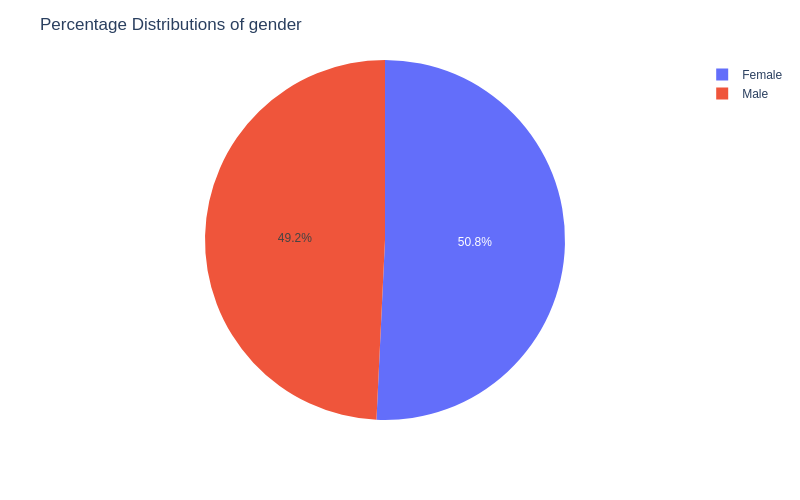

In [20]:
temp_df = pd.DataFrame(dataframe['Gender'].value_counts()).reset_index()
temp_df.columns = ["Gender","Count"]
fig = px.pie(temp_df, values='Count', names='Gender')
fig.update_layout(title_text="Percentage Distributions of gender")
fig.show(renderer='png', height=500, width=800)
#fig.show()